## Results - Line Charts

In [108]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [6]:
# data frames for conversation domain
conv_conf_df = pd.read_csv('al_results/third/ALResult_News_Conversation_confidence.csv')
conv_margin_df = pd.read_csv('al_results/third/ALResult_News_Conversation_margin.csv')
conv_random_df = pd.read_csv('al_results/third/ALResult_News_Conversation_random.csv')

# data frames for legal domain
legal_conf_df = pd.read_csv('al_results/third/ALResult_News_Legal_confidence.csv')
legal_margin_df = pd.read_csv('al_results/third/ALResult_News_Legal_margin.csv')
legal_random_df = pd.read_csv('al_results/third/ALResult_News_Legal_random.csv')

# data frames for social media domain
some_conf_df = pd.read_csv('al_results/third/ALResult_News_Social Media_confidence.csv')
some_margin_df = pd.read_csv('al_results/third/ALResult_News_Social Media_margin.csv')
some_random_df = pd.read_csv('al_results/third/ALResult_News_Social Media_random.csv')

In [9]:
# combining the data frames into a data frame for each domain
conv_df = pd.concat([conv_conf_df, conv_margin_df, conv_random_df])
legal_df = pd.concat([legal_conf_df, legal_margin_df, legal_random_df])
some_df = pd.concat([some_conf_df, some_margin_df, some_random_df])

In [14]:
# creating a list of method for each of the three target domains
conv_len = len(conv_conf_df)
conv_method = ['confidence']*conv_len + ['margin']*conv_len + ['random']*conv_len

legal_len = len(legal_conf_df)
legal_method = ['confidence']*legal_len + ['margin']*legal_len + ['random']*legal_len

some_len = len(some_conf_df)
some_method = ['confidence']*some_len + ['margin']*some_len + ['random']*some_len


# adding the method column to each of the combined data frames
conv_df['method'] = conv_method
legal_df['method'] = legal_method
some_df['method'] = some_method

c:\Users\sebas\.conda\envs\LSDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sebas\.conda\envs\LSDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sebas\.conda\envs\LSDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sebas\.conda\envs\LSDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

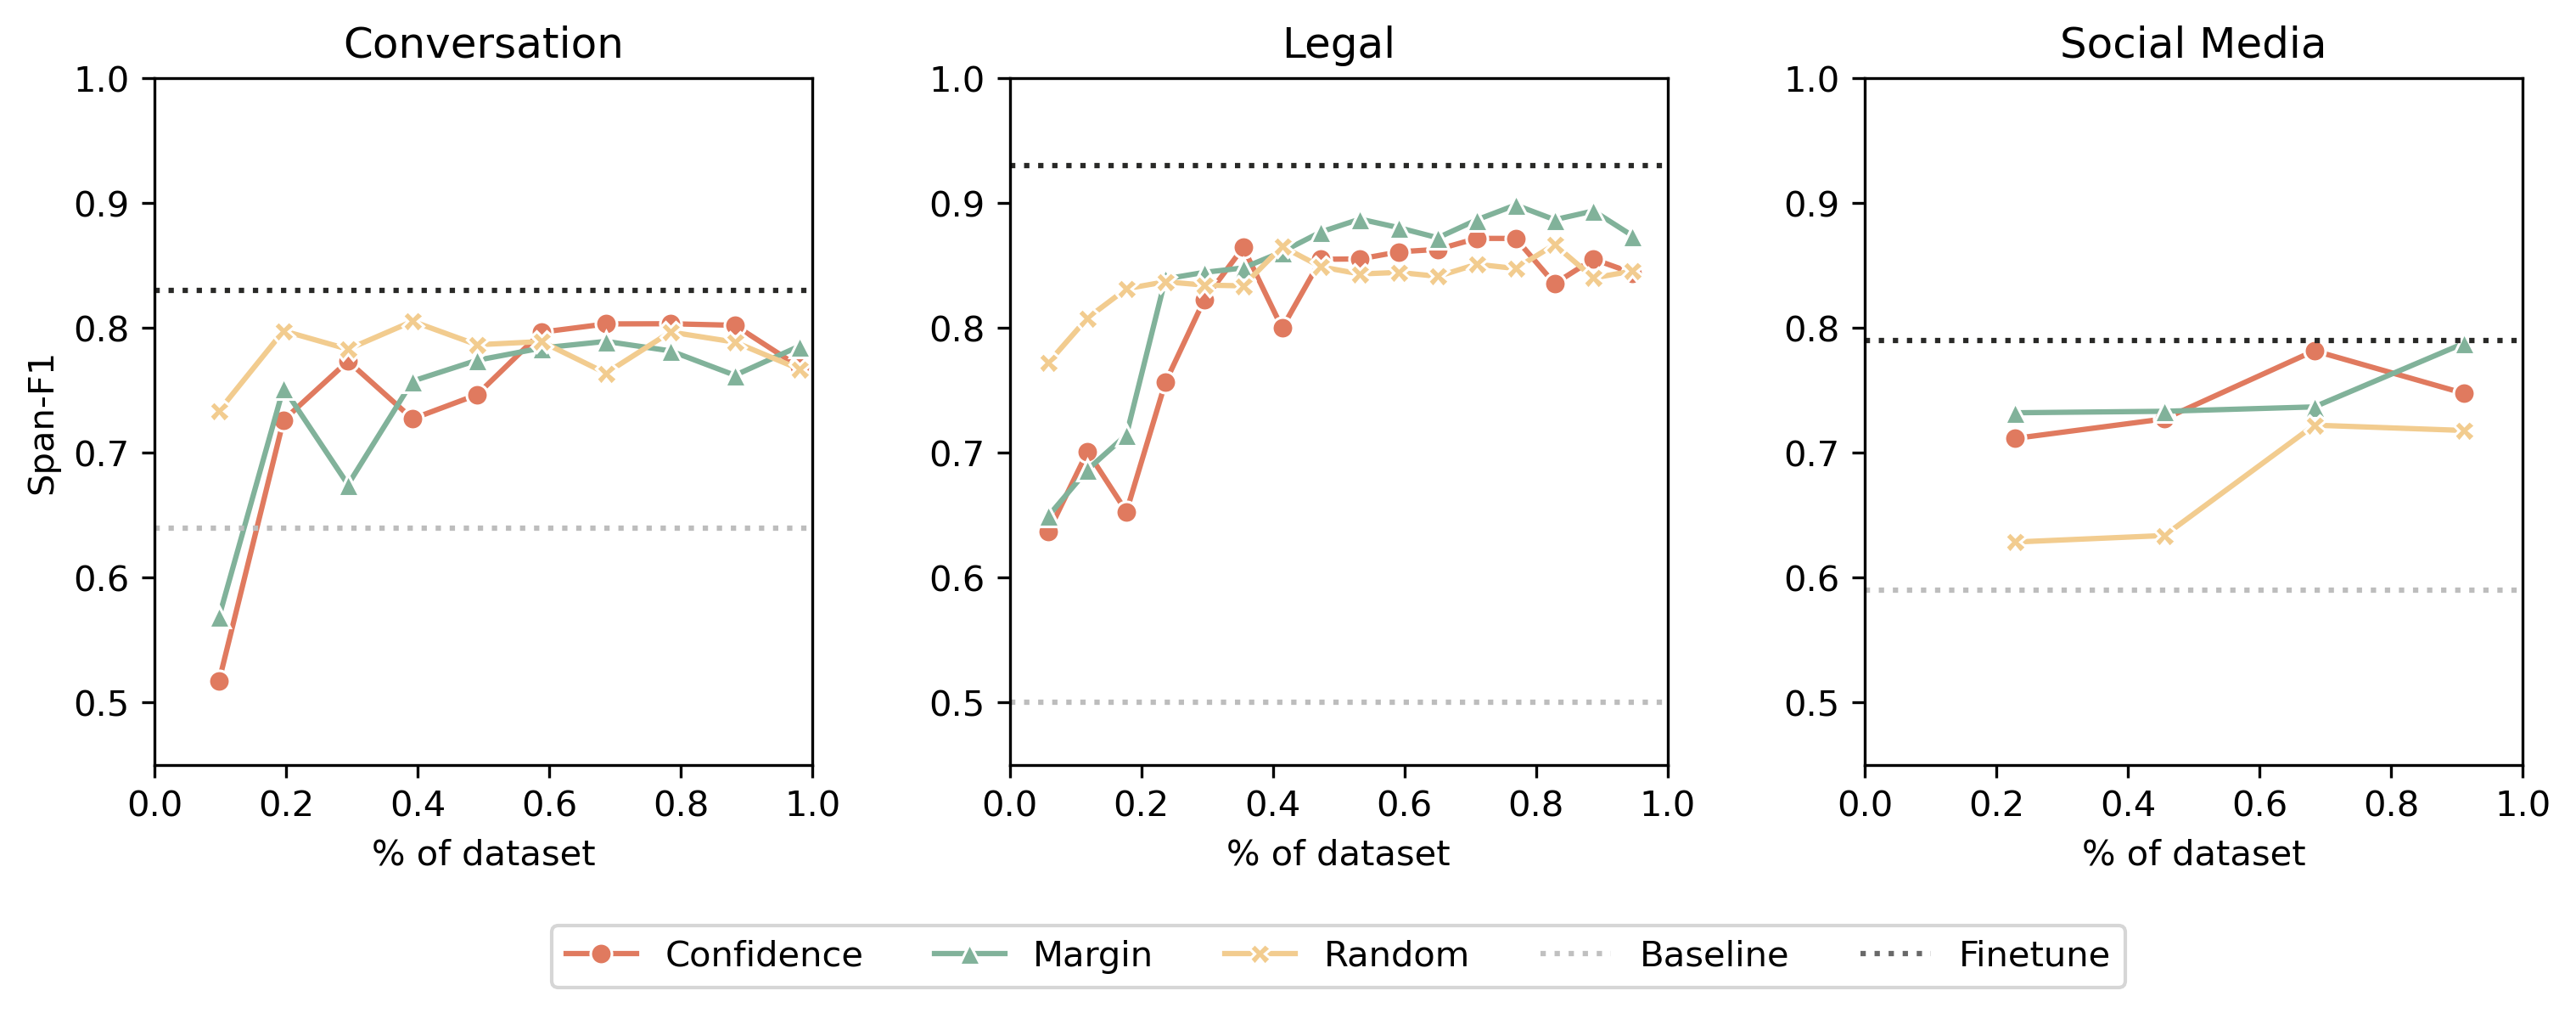

In [154]:
# increasing dpi for higher resolution
mpl.rcParams['figure.dpi'] = 300

# ranges of axes
x_min, x_max = 0, 1
y_min, y_max = 0.45, 1


n_cols, n_rows = 3, 1
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(12,3.5))
dfs = [conv_df, legal_df, some_df]
dfs = [df.replace({'method': {'confidence': 'Confidence', 'margin': 'Margin', 'random': 'Random'}}) for df in dfs]
custom_colors = {'confidence': '#e07a5f', 'margin': '#81b29a', 'random': '#f2cc8f'}
n_methods = len(custom_colors)
markers = {'confidence': 'o', 'margin': '^', 'random': 'X'}
titles = ['Conversation', 'Legal', 'Social Media']
baseline_values = [0.64, 0.5, 0.59]
finetune_values = [0.83, 0.93, 0.79]

for col in range(n_cols):
    for method, marker in markers.items():
        sns.lineplot(data=dfs[col][dfs[col]['method'] == method.capitalize()],  # Use capitalized method name
                        x='percentage_of_samples', 
                        y='f1', 
                        color=custom_colors[method], 
                        linestyle='-', 
                        marker=marker, 
                        ax=ax[col],
                        label=method.capitalize() if col == n_cols-2 else None)  # Use capitalized method name
        
    ax[col].set_xlabel('% of dataset')
    if col == 0:
        ax[col].set_ylabel('Span-F1')
    else:
        ax[col].set_ylabel('')
    ax[col].set_xlim([x_min, x_max])
    ax[col].set_ylim([y_min, y_max])
    ax[col].set_title(titles[col])
    ax[col].axhline(y=baseline_values[col], linewidth=1.5, color='#bdbdbd', ls=':')
    ax[col].axhline(y=finetune_values[col], linewidth=1.5, color='#292927', ls=':')

# Manually add constant lines to the legend
handles, labels = ax[1].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='silver', linestyle=':', label='Baseline'),
                plt.Line2D([0], [0], color='dimgray', linestyle=':', label='Finetune')])
ax[1].legend(handles=handles, labels=labels + ['Baseline', 'Finetune'], loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=5)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.show()